### 3.  SciPy (Linear Programming) and Application (Drones)

#### SciPy

SciPy (pronounced “Sigh Pie”) is open-source software for mathematics, science, and engineering.  
Topics: https://docs.scipy.org/doc/scipy/reference/  
See Example at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy.optimize.linprog

<img src="files/scipyproblem.jpg" alt="Drawing" style="width: 500px;"/>
<span style="font-family:Comic Sans MS"><center>From docs.scipy.org</center></span>


In [1]:
from scipy.optimize import linprog

c = [-1, 4]
A = [[-3, 1], [1, 2]]
b = [6, 4]
x0_bounds = (None, None)
x1_bounds = (-3, None)

res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds])
res

     con: array([], dtype=float64)
     fun: -22.0
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([3.90000000e+01, 1.77635684e-15])
  status: 0
 success: True
       x: array([10., -3.])

Time for some inspiration: https://youtu.be/w2itwFJCgFQ?start=378&end=676


In [13]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="960" height="560" src="https://www.youtube.com/embed/w2itwFJCgFQ?start=378&amp;end=676" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### 4. Graph Theory (NetworkX) and Wrap-up

#### Graph Theory (NetworkX)

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. The audience for NetworkX includes mathematicians, physicists, biologists, computer scientists, and social scientists. Graph Theory -> Trajectory planning  
Reference: https://networkx.org/documentation/stable/reference/index.html  
MST:https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.tree.mst.minimum_spanning_tree.html#networkx.algorithms.tree.mst.minimum_spanning_tree
Gallery: https://networkx.org/documentation/stable/auto_examples/index.html

In [3]:
#import ipyvolume as ipv #Imports a library called ipyvolume to help with plotting
#import numpy as np #Library import for array creation, and manipulation
import networkx as nx

G = nx.Graph()
G

In [4]:
G.add_node(1)
G.add_edge(3, 4)
G.add_node('E')

print(G.nodes)
print(G.edges)
print(G.adj[3])  # or list(G.neighbors(1))

[1, 3, 4, 'E']
[(3, 4)]
{4: {}}


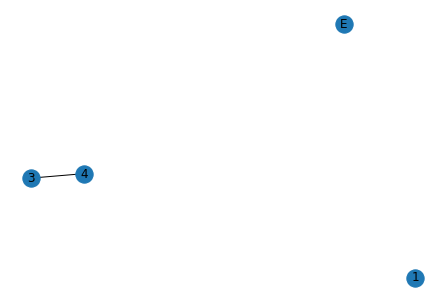

In [6]:
import matplotlib.pyplot as plt

plt.figure()
nx.draw(G, with_labels=True)

plt.show()

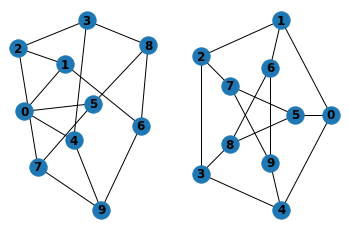

In [7]:
#import ipyvolume as ipv #Imports a library called ipyvolume to help with plotting
#import numpy as np #Library import for array creation, and manipulation
import networkx as nx
import matplotlib.pyplot as plt
plt.figure()

G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

plt.show()

#### Transshipment Problem (From Class)

<img src="files/Transshipment problem.jpg" alt="Drawing" style="width: 600px;"/>


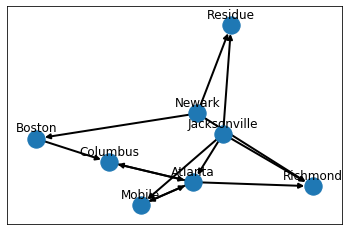

In [10]:
G = nx.DiGraph()
G.add_nodes_from(["Residue","Boston","Newark","Columbus","Atlanta","Richmond","Mobile","Jacksonville"])
G.add_weighted_edges_from([
    ("Newark", "Residue", 100000),
    ("Jacksonville", "Residue", 100000),
    ("Newark", "Boston", 30),
    ("Boston", "Columbus", 50),
    ("Newark", "Richmond", 40),
    ("Jacksonville", "Richmond", 50),
    ("Jacksonville", "Mobile", 50),
    ("Jacksonville", "Atlanta", 45),
    ("Atlanta", "Columbus", 40),
    ("Columbus", "Atlanta", 35),
    ("Atlanta", "Mobile", 35),
    ("Mobile", "Atlanta", 25),
    ("Atlanta", "Richmond", 30)
], weight = "cost")

G.node["Boston"]["Demand"] = 100
G.node["Columbus"]["Demand"] = 60
G.node["Atlanta"]["Demand"] = 170
G.node["Richmond"]["Demand"] = 80
G.node["Mobile"]["Demand"] = 70

G.node["Newark"]["Demand"] = -200
G.node["Jacksonville"]["Demand"] = -300
G.node["Residue"]["Demand"] = 20

plt.figure()

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, with_labels=False)
nx.draw_networkx_edges(G, pos, width=2)
for p in pos:  # raise text positions
    pos[p][1] += 0.09
nx.draw_networkx_labels(G, pos)

plt.show()

<img src="files/Transshipment problem.jpg" alt="Drawing" style="width: 600px;"/>


In [11]:
# Solve using the network simplex algorithm from the NetworkX package/library
# Reference: https://networkx.org/documentation/networkx-1.11/reference/generated/networkx.algorithms.flow.network_simplex.html
flowCost, flowDict = nx.network_simplex(G, weight='cost', demand="Demand")
# print(flowCost - 20*100000)
flowDict

{'Residue': {},
 'Boston': {'Columbus': 20},
 'Newark': {'Residue': 0, 'Boston': 120, 'Richmond': 80},
 'Columbus': {'Atlanta': 0},
 'Atlanta': {'Columbus': 40, 'Mobile': 0, 'Richmond': 0},
 'Richmond': {},
 'Mobile': {'Atlanta': 0},
 'Jacksonville': {'Residue': 20, 'Richmond': 0, 'Mobile': 70, 'Atlanta': 210}}

<span style="font-family:Comic Sans MS">->>> Chinese Postman Problem -->>>  </span>  
Start Here: https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial  
Then Here:http://brooksandrew.github.io/simpleblog/articles/sleeping-giant-rural-postman-problem